In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=7.25177659880919 et b_1=5.0754256347491395


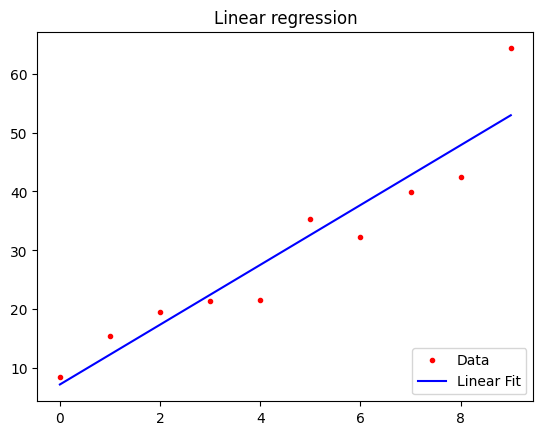

In [2]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [6]:

# -----------------------------
# Função para estimar b0, b1 e s²
# -----------------------------
def estimate_params(x, y):
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)
    b0 = lr.intercept_
    b1 = lr.coef_[0]
    
    y_pred = lr.predict(x[:, np.newaxis])
    n = len(y)
    s2 = np.sum((y - y_pred)**2) / (n - 1)
    
    return b0, b1, s2

# -----------------------------
# Experimento: 5 rodadas com e sem outlier
# -----------------------------
results = {"condição": [], "b0": [], "b1": [], "s2": []}

for i in range(5):
    # sem outlier
    x, y = generate_data(n_samples=10, outlier=False, b_1=4.)
    b0, b1, s2 = estimate_params(x, y)
    results["condição"].append("sem outlier")
    results["b0"].append(b0)
    results["b1"].append(b1)
    results["s2"].append(s2)
    
    # com outlier
    x, y = generate_data(n_samples=10, outlier=True, b_1=4.)
    b0, b1, s2 = estimate_params(x, y)
    results["condição"].append("com outlier")
    results["b0"].append(b0)
    results["b1"].append(b1)
    results["s2"].append(s2)

# Tabela final
df = pd.DataFrame(results)
print(df)

# Médias comparativas
print("\nMédias por condição:")
print(df.groupby("condição").mean(numeric_only=True))

      condição         b0        b1         s2
0  sem outlier  10.881846  3.700782   4.178719
1  com outlier   7.528242  4.948390  37.560672
2  sem outlier   9.754292  4.281362  15.731972
3  com outlier   2.307119  6.138701  22.193544
4  sem outlier  10.935854  3.923609   6.369435
5  com outlier   5.901471  5.141122  52.244544
6  sem outlier   8.697420  3.935642   7.666559
7  com outlier   8.731865  5.123218  44.430810
8  sem outlier  11.164793  3.866871  11.811144
9  com outlier   5.143529  5.252447  62.556072

Médias por condição:
                    b0        b1         s2
condição                                   
com outlier   5.922445  5.320776  43.797128
sem outlier  10.286841  3.941653   9.151566


Sem outlier: o modelo recupera bem os parâmetros verdadeiros.
Com outlier: distorce toda a estimativa, por obrigar a reta a se ajustar.

Ou seja, os outliers tem enorme impacto em regressão linear com mínimos quadrados (pois o erro está ao quadrado).

La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [7]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [15]:
def profil_residuel(x, y, i):
    # e_(i)j = y_j - yhat_(i)j
    x = np.asarray(x); y = np.asarray(y)
    n = len(x)
    errors = np.zeros((n,n))
    for i in range(n):
        x_del = np.delete(x,i)
        y_del = np.delete(y,i)
        lr = LinearRegression().fit(x_del[:,None],y_del)
        y_hati = lr.predict(x[:,None])
        errors[i,:] = y - y_hati
    return errors

In [ ]:
# Exemplo de uso:
# x, y = generate_data(n_samples=10, outlier=True, b_1=4.)
print("Perfil removendo i=9 (outlier):")
print(np.round(profil_residuel(x, y, 9), 3))

Perfil removendo i=9 (outlier):
[[-3.108  3.428  0.851  0.19  -1.284 -2.435 -5.146  1.314 -5.547  8.63 ]
 [-0.357  5.765  2.773  1.698 -0.19  -1.755 -4.88   1.166 -6.109  7.654]
 [-1.579  4.729  1.923  1.034 -0.667 -2.046 -4.984  1.248 -5.841  8.108]
 [-1.877  4.474  1.711  0.865 -0.794 -2.131 -5.026  1.248 -5.798  8.193]
 [-2.16   4.212  1.471  0.647 -0.991 -2.306 -5.179  1.117 -5.907  8.106]
 [-2.213  4.138  1.376  0.531 -1.128 -2.463 -5.358  0.917 -6.128  7.864]
 [-2.14   4.12   1.267  0.331 -1.419 -2.846 -5.831  0.353 -6.784  7.117]
 [-2.087  4.323  1.621  0.834 -0.765 -2.042 -4.877  1.457 -5.529  8.522]
 [-1.329  4.708  1.632  0.473 -1.5   -3.15  -6.359 -0.397 -7.757  5.921]
 [-3.851  3.196  1.131  0.982  0.02  -0.619 -2.818  4.154 -2.195 12.494]]


#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [18]:
# perfil ao remover o outlier
e_outlier = profil_residuel(x, y, 9)

# perfis médios removendo os outros pontos
E_others = [profil_residuel(x, y, i) for i in range(len(x)) if i != 9]
e_mean = np.mean(E_others, axis=0)

print("Perfil médio sem outlier (i ≠ 9):")
print(np.round(e_mean, 3))

print("\nPerfil ao remover i=9 (outlier):")
print(np.round(e_outlier, 3))


Perfil médio sem outlier (i ≠ 9):
[[-3.108  3.428  0.851  0.19  -1.284 -2.435 -5.146  1.314 -5.547  8.63 ]
 [-0.357  5.765  2.773  1.698 -0.19  -1.755 -4.88   1.166 -6.109  7.654]
 [-1.579  4.729  1.923  1.034 -0.667 -2.046 -4.984  1.248 -5.841  8.108]
 [-1.877  4.474  1.711  0.865 -0.794 -2.131 -5.026  1.248 -5.798  8.193]
 [-2.16   4.212  1.471  0.647 -0.991 -2.306 -5.179  1.117 -5.907  8.106]
 [-2.213  4.138  1.376  0.531 -1.128 -2.463 -5.358  0.917 -6.128  7.864]
 [-2.14   4.12   1.267  0.331 -1.419 -2.846 -5.831  0.353 -6.784  7.117]
 [-2.087  4.323  1.621  0.834 -0.765 -2.042 -4.877  1.457 -5.529  8.522]
 [-1.329  4.708  1.632  0.473 -1.5   -3.15  -6.359 -0.397 -7.757  5.921]
 [-3.851  3.196  1.131  0.982  0.02  -0.619 -2.818  4.154 -2.195 12.494]]

Perfil ao remover i=9 (outlier):
[[-3.108  3.428  0.851  0.19  -1.284 -2.435 -5.146  1.314 -5.547  8.63 ]
 [-0.357  5.765  2.773  1.698 -0.19  -1.755 -4.88   1.166 -6.109  7.654]
 [-1.579  4.729  1.923  1.034 -0.667 -2.046 -4.984  1.2

#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [19]:
# Serve para detectar pontos influentes 
def cook(x, y, i):
    x = np.asarray(x); y = np.asarray(y)
    n = len(x); p = 2  # intercepto + slope
    
    # modelo completo
    lr_full = LinearRegression().fit(x[:, None], y)
    yhat_full = lr_full.predict(x[:, None])
    e = y - yhat_full
    mse = np.sum(e**2) / (n - p)
    
    # leverage do ponto i (regressão simples)
    xbar = x.mean()
    Sxx = np.sum((x - xbar)**2)
    h_i = (1/n) + ((x[i] - xbar)**2)/Sxx
    
    # distância de Cook para ponto i
    D_i = (e[i]**2 / (p * mse)) * (h_i / (1 - h_i)**2)
    return D_i
    # D_i pequeno -> ponto i não afeta muito a regressão
    # D_i grande -> ponto i tem grande influência

# Exemplo de uso:
for i in range(len(x)):
    print(f"Cook's distance D[{i}] = {cook(x, y, i):.3f}")

Cook's distance D[0] = 0.083
Cook's distance D[1] = 0.207
Cook's distance D[2] = 0.016
Cook's distance D[3] = 0.002
Cook's distance D[4] = 0.003
Cook's distance D[5] = 0.016
Cook's distance D[6] = 0.108
Cook's distance D[7] = 0.009
Cook's distance D[8] = 0.374
Cook's distance D[9] = 1.349


## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...